In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")

In [3]:
head(filtered)

,ID,CHROM,POS,REF,ALT,CHROM.POS.REF.ALT,ANNO,GENE,GNOMAD_FREQ,REPEAT_MASKER,⋯,NORMAL_CI_IS_GREATER,Mosaic,Mosaic_shared_btw_WGS_Amp,Hemisphere,Region,Punch,Cell_Type,Location,Organ,Note
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,7669_AO_1_Bulk,1,1196724,A,T,1-1196724-A-T,intronic,UBE2J2,0.000e+00,0,⋯,FFFFF_FFFFF,1,1,M,AO,1,Bulk,NA,HEART,NA
2,7669_AO_1_Bulk,1,2878285,C,T,1-2878285-C-T,intergenic,"TTC34(dist=172055),ACTRT2(dist=59761)",3.230e-05,0,⋯,FFFFF_FFFFF,0,0,M,AO,1,Bulk,NA,HEART,NA
3,7669_AO_1_Bulk,1,3182127,G,A,1-3182127-G-A,intronic,PRDM16,0.000e+00,0,⋯,FFFFF_FFFFF,0,0,M,AO,1,Bulk,NA,HEART,NA
4,7669_AO_1_Bulk,1,4450513,G,A,1-4450513-G-A,intergenic,"LINC01346(dist=437870),LINC01777(dist=21598)",9.691e-05,0,⋯,FFFFF_FFFFF,1,1,M,AO,1,Bulk,NA,HEART,NA
5,7669_AO_1_Bulk,1,4465349,T,G,1-4465349-T-G,intergenic,"LINC01346(dist=452706),LINC01777(dist=6762)",0.000e+00,0,⋯,FFFFF_FFFFF,1,1,M,AO,1,Bulk,NA,HEART,NA
6,7669_AO_1_Bulk,1,5764433,A,G,1-5764433-A-G,intergenic,"MIR4417(dist=140230),MIR4689(dist=158299)",0.000e+00,0,⋯,FFFFF_FFFFF,0,0,M,AO,1,Bulk,NA,HEART,NA


In [3]:
names(filtered)

[1] "ID"                        "CHROM"                    
 [3] "POS"                       "REF"                      
 [5] "ALT"                       "CHROM.POS.REF.ALT"        
 [7] "ANNO"                      "GENE"                     
 [9] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[11] "SEGDUP"                    "HOMOPOLYMER"              
[13] "REF_SEQ"                   "DINUCLEOTIDE"             
[15] "NEAR_INDEL"                "UCSC_RPMSK"               
[17] "REF_COUNT"                 "ALT_COUNT"                
[19] "MAF"                       "LOWER_CI"                 
[21] "UPPER_CI"                  "CI_IS_GREATER"            
[23] "NORMAL_REF_COUNT"          "NORMAL_ALT_COUNT"         
[25] "NORMAL_MAF"                "NORMAL_LOWER_CI"          
[27] "NORMAL_UPPER_CI"           "NORMAL_CI_IS_GREATER"     
[29] "Mosaic"                    "Mosaic_shared_btw_WGS_Amp"
[31] "Hemisphere"                "Region"                   
[33] "Punch"                     "Cell_Type"                
[35] "Location"                  "Organ"                    
[37] "Note"

In [82]:
unique(filtered$Hemisphere)
unique(filtered$Region)
unique(filtered$Punch)
unique(filtered$Cell_Type)
unique(filtered$Location)
unique(filtered$Organ)
unique(filtered$Note)

[1] "M" "L" "R" NA

[1] "AO"      "LA10"    "Adrenal" "Cb"      "CC"      "EC"      "F"      
 [8] "I"       "Liver"   "Kidney"  "mO"      "O"       "P"       "POA"    
[15] "Cau"     "Put"     "GP"      "Thal"    "Hip"     "Skin"    "T"      
[22] "LV15"    "RA9"     "kidney"  "Olf"     "RV10"    NA

[1] "1"    "2"    NA     "sec1" "sec2" "sec3" "10"   "11"   "3"    "4"   
[11] "5"    "6"    "7"    "8"    "9"    "12"   "13"   "14"   "15"   "16"  
[21] "17"

[1] "Bulk"    "COUPTF2" "DLX1"    "TBR1"    "NeuN"    NA

[1] NA        "A"       "P"       "C"       "FAR_V"   "FAR_D"   "NEAR_A" 
 [8] "NEAR_P"  "NEAR_D"  "NEAR_V"  "NEAR_AV" "NEAR_AD" "NEAR_PV" "NEAR_PD"
[15] "FAR_AD"  "FAR_A"   "FAR_AV"  "FAR_P"   "FAR_PD"  "FAR_PV"

[1] "HEART"   "ADRENAL" "CB"      "CTX"     "LIVER"   "KIDNEY"  "POA"    
 [8] "BG"      "THAL"    "HIP"     "SKIN"    "OLF"     NA

[1] NA          "LOW_INPUT"

In [4]:
length(unique(filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]$CHROM.POS.REF.ALT))

[1] 743

In [4]:
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]
mosaic_filtered_cutoff<- mosaic_filtered[mosaic_filtered$LOWER_CI>0.002360687 & mosaic_filtered$UPPER_CI<0.4562841,]

In [96]:
length(mosaic_filtered$ID)

[1] 109221

In [45]:
variant_list<-unique(filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]$CHROM.POS.REF.ALT)

In [46]:
variant_list<-as.data.frame(variant_list, row.names = variant_list )
variant_list$sample_number_presented <- NA

In [48]:
for (i in 1:nrow(variant_list)){
    filtered2 <- filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]
    n_row <- nrow(filtered2[filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$LOWER_CI>0.002360687 & 
          filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$UPPER_CI<0.4562841,])
    variant_list$sample_number_presented[i] <- n_row
    }

In [84]:
# Non-private Mosaic variants
nrow(variant_list[variant_list$sample_number_presented>1,])

[1] 194

In [178]:
ctx_mosaic_filtered_cutoff <- mosaic_filtered_cutoff[na.omit(mosaic_filtered_cutoff$Organ == 'CTX'),]
length(unique(ctx_mosaic_filtered_cutoff$CHROM.POS.REF.ALT))

[1] 176

In [191]:
cortex and other organ shared variants
other_mosaic_filtered_cutoff <- mosaic_filtered_cutoff[(na.omit(mosaic_filtered_cutoff$Organ %in% c(NA,'HIP','HEART','BG','POA','ADRENAL','CB','LIVER','KIDNEY','THAL','SKIN','OLF'))),]
length(unique(ctx_mosaic_filtered_cutoff[ctx_mosaic_filtered_cutoff$CHROM.POS.REF.ALT %in% other_mosaic_filtered_cutoff$CHROM.POS.REF.ALT,]$CHROM.POS.REF.ALT))

[1] 152

In [174]:
ctx_mosaic_filtered_cutoff <- mosaic_filtered_cutoff[na.omit(mosaic_filtered_cutoff$Organ == 'BG'),]
length(unique(ctx_mosaic_filtered_cutoff$CHROM.POS.REF.ALT))

[1] 154

In [175]:
ctx_mosaic_filtered_cutoff <- mosaic_filtered_cutoff[na.omit(mosaic_filtered_cutoff$Organ == 'POA'),]
length(unique(ctx_mosaic_filtered_cutoff$CHROM.POS.REF.ALT))

[1] 139

In [177]:
ctx_mosaic_filtered_cutoff <- mosaic_filtered_cutoff[na.omit(mosaic_filtered_cutoff$Organ == 'HEART'),]
length(unique(ctx_mosaic_filtered_cutoff$CHROM.POS.REF.ALT))

[1] 225

In [5]:
library(reshape2)

In [317]:
melt_mtcars<-mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Organ",'Region','Punch','Hemisphere')]

In [331]:
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('COUPTF2','DLX1','TBR1','NeuN'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1'),]

In [332]:
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [333]:
melt_mtcars

,ID,MAF,CHROM.POS.REF.ALT,Cell_Type,Organ,Region,Punch,Hemisphere
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
137143,7669_R_EC_COUPTF2,0.09717836,1-1196724-A-T,COUPTF2,CTX,EC,1,R
137146,7669_R_EC_COUPTF2,0.16751688,1-4450513-G-A,COUPTF2,CTX,EC,1,R
137147,7669_R_EC_COUPTF2,0.00000000,1-4465349-T-G,COUPTF2,CTX,EC,1,R
137150,7669_R_EC_COUPTF2,0.18945137,1-9049289-T-C,COUPTF2,CTX,EC,1,R
137151,7669_R_EC_COUPTF2,0.00000000,1-9516326-C-T,COUPTF2,CTX,EC,1,R
137153,7669_R_EC_COUPTF2,0.13705663,1-9672930-G-A,COUPTF2,CTX,EC,1,R
137159,7669_R_EC_COUPTF2,0.10202335,1-18387130-C-T,COUPTF2,CTX,EC,1,R
137160,7669_R_EC_COUPTF2,0.00000000,1-18400310-C-T,COUPTF2,CTX,EC,1,R
137174,7669_R_EC_COUPTF2,0.14905280,1-35110389-G-T,COUPTF2,CTX,EC,1,R


In [334]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Cell_Type+Organ+Region+Hemisphere+Punch~CHROM.POS.REF.ALT, value.var = "MAF" , na.rm=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$ID

In [335]:
library(umap)

In [336]:
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[ , !(names(casted_MAF_VarBySample) %in% c("Punch","ID","Cell_Type","Organ","Region","Hemisphere"))]
casted_MAF_VarBySample_umap<-umap(casted_MAF_VarBySample2)

In [337]:
df<-as.data.frame(casted_MAF_VarBySample_umap$layout)

In [338]:
df$Cell_Type<-NA
df$Organ<-NA
df$Region<-NA
df$Hemisphere<-NA
df$Punch<-NA

df$Cell_Type<-casted_MAF_VarBySample$Cell_Type
df$Organ<-casted_MAF_VarBySample$Organ
df$Region<-casted_MAF_VarBySample$Region
df$Hemisphere<-casted_MAF_VarBySample$Hemisphere
df$Punch<-casted_MAF_VarBySample$Punch

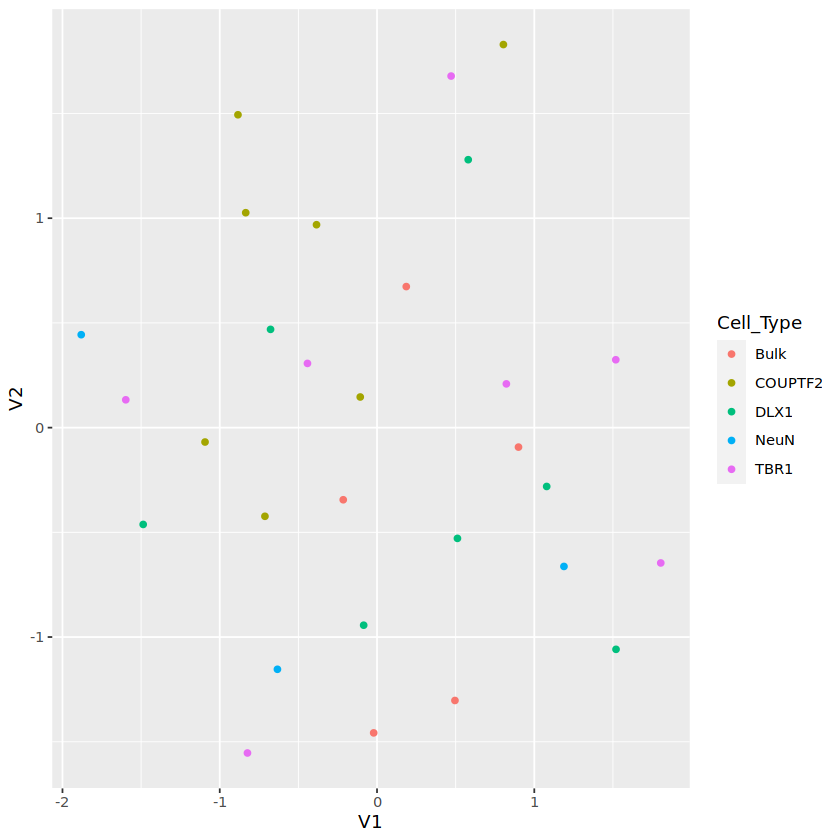

In [339]:
ggplot(df, aes(x=V1, y=V2, color=Cell_Type)) +
  geom_point()

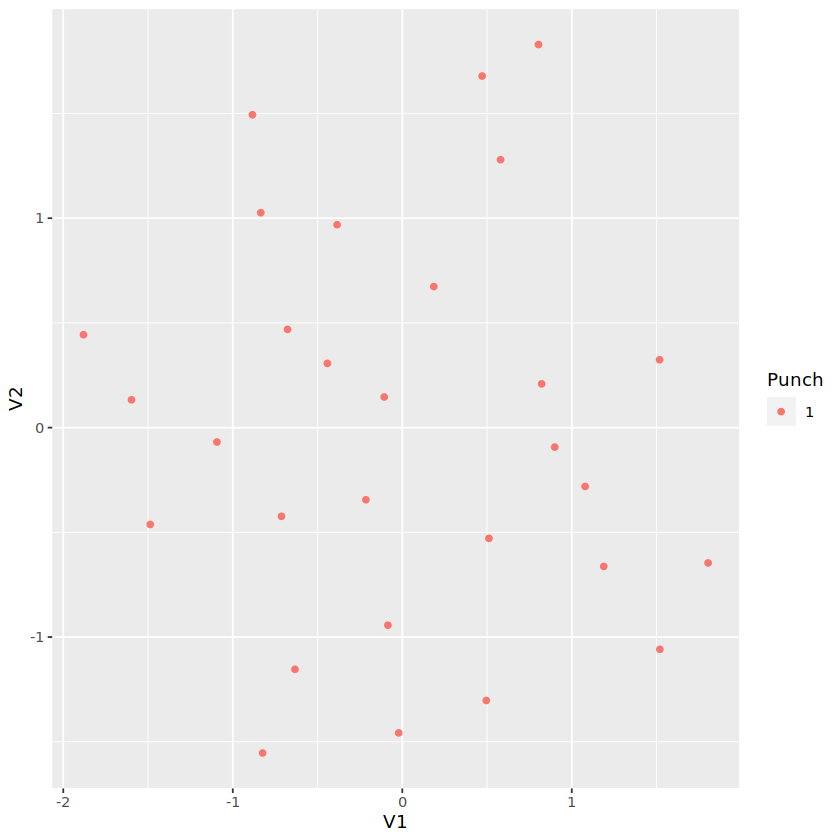

In [340]:
ggplot(df, aes(x=V1, y=V2, color=Punch)) +
  geom_point()

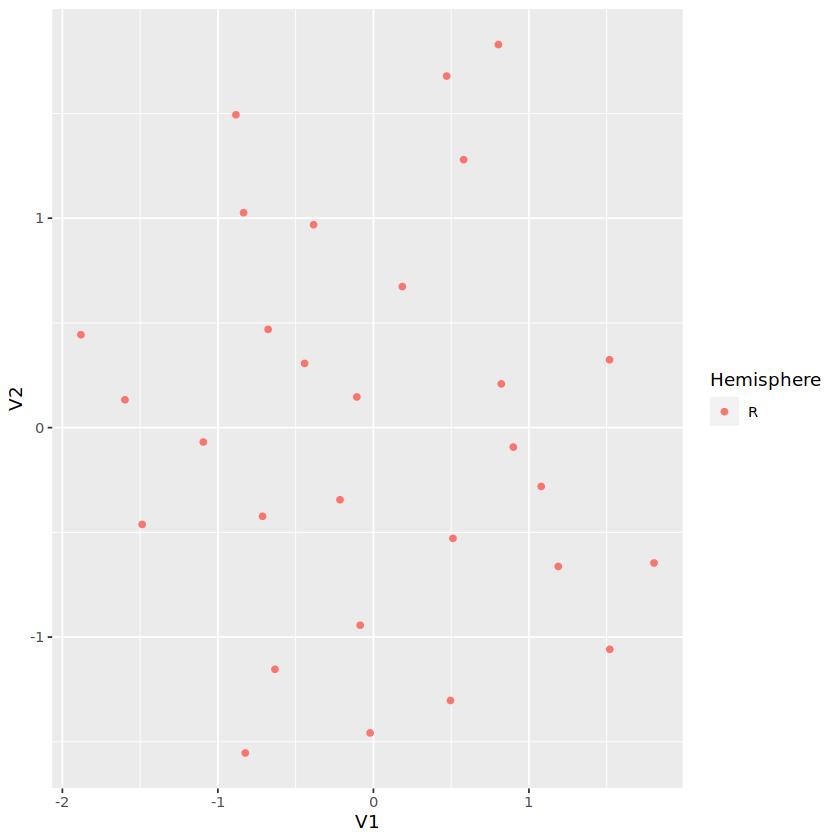

In [341]:
ggplot(df, aes(x=V1, y=V2, color=Hemisphere)) +
  geom_point()

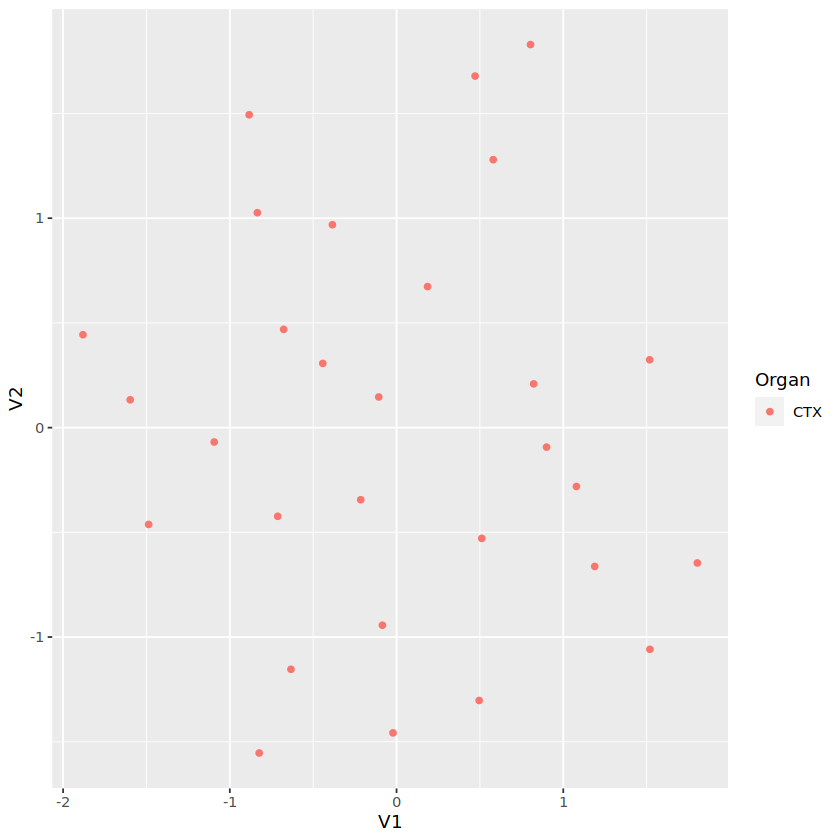

In [342]:
ggplot(df, aes(x=V1, y=V2, color=Organ)) +
  geom_point()

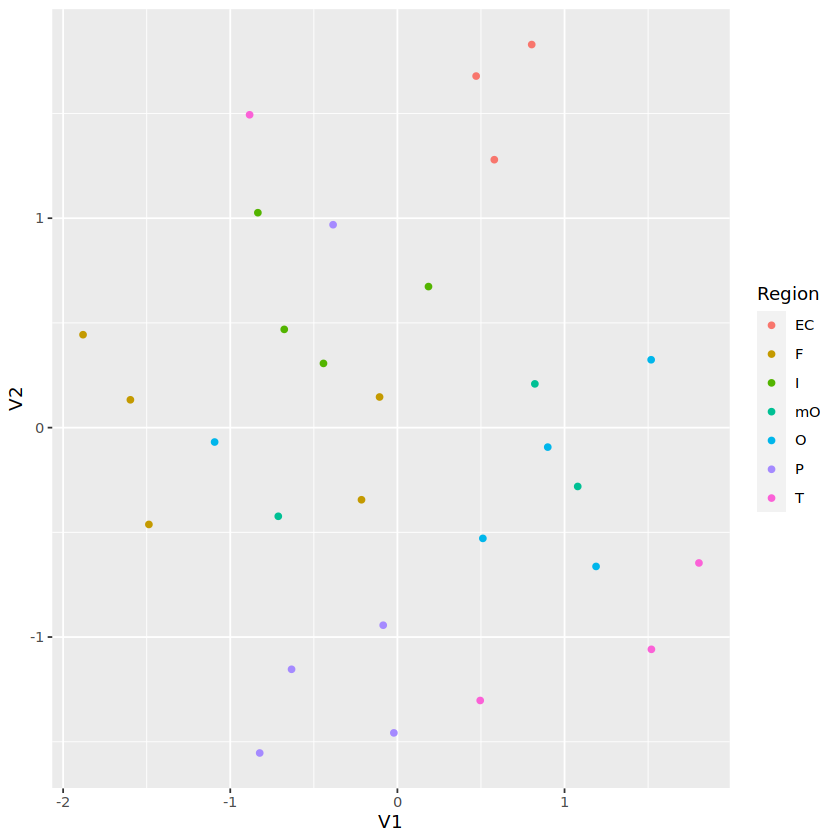

In [343]:
ggplot(df, aes(x=V1, y=V2, color=Region)) +
  geom_point()